In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [522]:
def rindex(lst, value):
    lst.reverse()
    i = lst.index(value)
    lst.reverse()
    return len(lst) - i - 1

In [540]:
def clear_path(tour):

    visited={-1}
    sol=[]
    
    for i in range(len(tour)):
        ok=True
        if tour[i] not in visited:
            visited=visited.union({tour[i]})
            sol.append(tour[i])
        else:
            j=rindex(sol,tour[i])+1
            a=rindex(sol,tour[i])
            while j<len(sol) and ok :  
                if  sol[j] not in sol[:a]:
                    ok=False
                else:
                    j+=1

            if ok==True:
                sol=sol[:a]+[tour[i]]
            else:
                sol.append(tour[i])
        
    return sol    
            
            

In [683]:

     def adjacents(tour):
         
        # Generate all consecutive pairs
        pairs = [tuple(sorted((tour[i], tour[i + 1]))) for i in range(len(tour) - 1)]
        # Use a set to remove duplicate pairs
        unique_pairs = list(set(pairs))
        return unique_pairs

In [676]:
class AntColony:
    def __init__(self, d, m, n_iter, ro, alpha, beta,epsilon, first_city):
        self.d = d
        self.N = len(d)
        self.tau = np.ones(self.d.shape) / self.N
        self.m = m
        self.n_iter = n_iter
        self.ro = ro
        self.alpha = alpha
        self.beta = beta
        self.epsilon = epsilon
        self.first_city = first_city
        self.best_route = None
        self.best_length = float('inf')
        self.history = [] 




    # general algorithm
    def run(self):
        for _ in range(self.n_iter):
            tours = self.generate_tours()
            self.update_pheromones(tours)

            best_local_route, best_local_length = self.get_best(tours)
            if best_local_length < self.best_length:
                self.best_route = best_local_route
                self.best_length = best_local_length
            self.history.append((self.best_route, self.best_length))  # Save best route and length in history
        return self.best_route, self.best_length

    # generate all the tours by each ant and its length
    def generate_tours(self):
        tours = []
        for _ in range(self.m):
            tour = self.generate_ant_tour()
            tours.append((tour, self.total_length(tour)))
        return tours

    # generate a tour for each ant
    def generate_ant_tour(self):
        tour = [self.first_city]
        visited = {self.first_city}
        current_city = self.first_city
        while len(visited)< self.N : #or current_city!=self.first_city):
            current_city = tour[-1]
            next_city = self.pick_next_city(current_city, tour)
            tour.append(next_city)
            visited=visited.union({next_city})
           
        return clear_path(tour)
        #return tour

    # pick the next city on the tour
    def pick_next_city(self, current_city, tour):
        pheromone = self.tau[current_city]
        distances = self.d[current_city]
        distances[current_city]=np.inf
        probabilities = (pheromone**self.alpha) * ((1 / distances)**self.beta)
        probabilities = np.where(np.isin(range(self.N), tour),self.epsilon*probabilities , probabilities)
        probabilities /= probabilities.sum()
        #print(probabilities)
        #time.sleep(5)
        return np.random.choice(range(self.N), p=probabilities)

    # compute total length of a tour
    def total_length(self, tour):
        length = sum(self.d[tour[i], tour[i+1]] for i in range(len(tour)-1)
        return length

   

    # update the pheromones considering all the ants' tours
    def update_pheromones(self, tours):
        self.tau *= (1 - self.ro)
        for tour, length in tours:            
            pairs = adjacents(tour)
            for i,j in pairs:
                self.tau[i,j] += 1 / length
                self.tau[j,i] += 1 / length

    def get_best(self, tours):
        return min(tours, key=lambda x: x[1])


In [17]:
a={1,2,3}
a.union({4})
len(a)

3

array([2, 3])

In [350]:
a=[(2,3),(3,2)]
tuple(sorted((3,2)))

(2, 3)

In [92]:
np.random.seed(42)

num_cities = 10
cities = np.random.rand(num_cities, 2)  

In [94]:
print(cities)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]


In [106]:
a=[1,2,3,4]
a[2:]

[3, 4]

In [126]:
N = len(cities)
diff = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
d = np.sqrt(np.sum(diff**2, axis=-1))
d[0,2:] =np.inf
d[2:,0]=np.inf
d[2,2:] =np.inf
d[2:,2]=np.inf
d[8,7:]=np.inf
d[7:,8] =np.inf
d[8,:6]=np.inf
d[:6,8]=np.inf
d[4]

array([       inf, 0.17058938,        inf, 0.56557921, 0.        ,
       0.63684727, 0.5470504 , 0.67162543,        inf, 0.44986324])

In [685]:
## N = len(cities)
#diff = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
#d = np.sqrt(np.sum(diff**2, axis=-1))

ant_colony = AntColony(d, m=2, n_iter=100, ro=0.1, alpha=1, beta=2,epsilon=0.001, first_city=0)
best_tour, best_length = ant_colony.run() 

print(f"Best tour: {best_tour}")
print(f"Best length: {best_length}")

Best tour: [0, 1, 2, 1, 4, 5, 3, 7, 9, 6, 8]
Best length: 4.860448272266219


In [681]:
b=[]
for i in range(30):
    ant_colony = AntColony(d, m=2, n_iter=100, ro=0.1, alpha=1, beta=2,epsilon=0.001, first_city=0)
    best_tour, best_length = ant_colony.run() 
    b.append(best_length)
 
np.mean(b)    

4.9754196701980336

In [674]:
np.mean(b)  

5.007136635480345

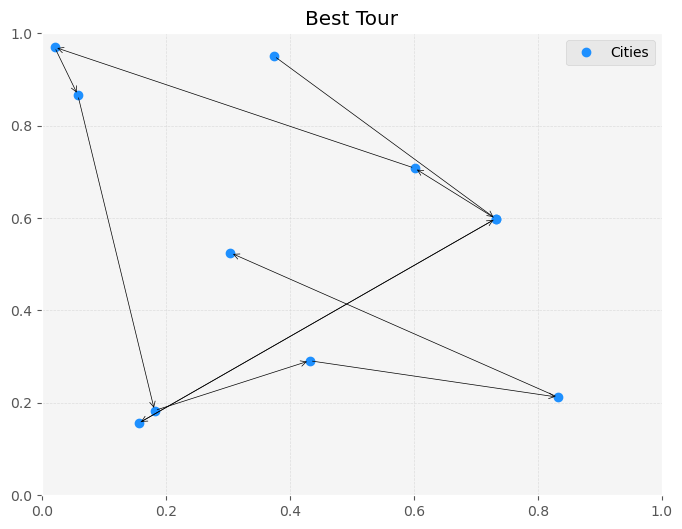

In [715]:

l_grafico = [cities[x] for x in best_tour]

# Extract the x and y coordinates for plotting
l_x = [l_grafico[i][0] for i in range(len(best_tour))]
l_y = [l_grafico[i][1] for i in range(len(best_tour))]


# Plot the path as a graph with arrows
plt.figure(figsize=(8, 6))

# Plot the cities as points
plt.plot(l_x, l_y, 'o', label="Cities", color='dodgerblue')

# Add arrows for directed edges
for i in range(len(best_tour) - 1):
    start_x, start_y = l_grafico[i]
    end_x, end_y = l_grafico[i + 1]
    # Use annotate to draw arrows
    plt.annotate(
        '', xy=(end_x, end_y), xytext=(start_x, start_y),
        arrowprops=dict(arrowstyle='->', color='black')
    )

# Adjust the plot
plt.style.use('ggplot')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.gca().set_facecolor('whitesmoke')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Best Tour")
plt.legend()
#plt.grid(True)
plt.show()